# Points and Lines

![alt text](resources/assets/africa_rivers_1.png "Title")

![alt text](resources/assets/undersea_cables_dark.png "Title")

![alt text](resources/assets/co2_emissions.png "Title")

![alt text](resources/assets/challenge.png "Title")

In [1]:
import pandas as pd
ports = pd.read_csv("resources/ports.csv")

In [2]:
print(ports)

             lat         lon
0      19.432680   93.554935
1      54.532050   18.526400
2      40.656520   27.663445
3      50.474590    4.009098
4      28.391250  129.503900
...          ...         ...
19838  37.062715  -79.560240
19839  34.690600  -76.560000
19840  60.094400   24.752800
19841  59.460300   16.318600
19842  29.375600   34.793900

[19843 rows x 2 columns]


In [3]:
from shapely.geometry import Point
import geopandas as gpd

port_geometry = [Point(xy) for xy in zip(ports['lon'], ports['lat'])]
port_geodata = gpd.GeoDataFrame(ports, crs="EPSG:4326", geometry=port_geometry)

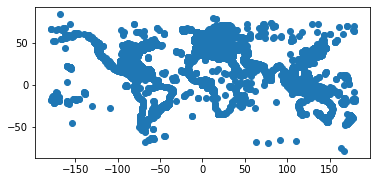

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
port_geodata.plot(ax=ax)
plt.savefig(f"outputs/points_1.png", dpi=600, bbox_inches='tight')
plt.show()

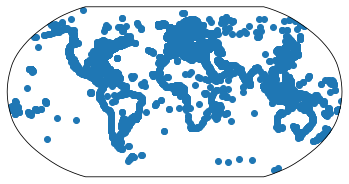

In [7]:
import cartopy.crs as ccrs

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()})
port_geodata.plot(ax=ax, transform=ccrs.PlateCarree())
plt.savefig(f"outputs/points_2.png", dpi=600, bbox_inches='tight')
plt.show()

#### Exercise 1

- `plt.subplots(facecolor="")`
- `ax.patch.set_facecolor('black')`
- `port_geodata(ax=ax, markersize=, edgecolors=, color=, alpha=)`

My attempt

![alt text](resources/assets/ports.png "Title")


In [1]:
fig, ax = plt.subplots()
port_geodata.plot(ax=ax)
plt.show()

NameError: name 'plt' is not defined

In [10]:
airports = pd.read_csv("resources/airports", delimiter=',', names=['id', 'name', 'city', 'country', 'iata', 
                                                                   'icao', 'lat', 'long', 'altitude', 'timezone',
                                                                   'dst', 'tz', 'type', 'source'])

In [11]:
print(airports)

         id                                         name          city  \
0         1                               Goroka Airport        Goroka   
1         2                               Madang Airport        Madang   
2         3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3         4                               Nadzab Airport        Nadzab   
4         5  Port Moresby Jacksons International Airport  Port Moresby   
...     ...                                          ...           ...   
7693  14106                          Rogachyovo Air Base        Belaya   
7694  14107                        Ulan-Ude East Airport      Ulan Ude   
7695  14108                         Krechevitsy Air Base      Novgorod   
7696  14109                  Desierto de Atacama Airport       Copiapo   
7697  14110                           Melitopol Air Base     Melitopol   

               country iata  icao        lat        long  altitude timezone  \
0     Papua New Guinea  GKA  AYG

### Exercise 2

- Create a list of points from the lat/long values in the airports DataFrame
- Convert the airports dataframe to a GeoDataFrame using the list of points created above
- Generate a map of the worlds airports

In [12]:
airport_geometry = 

SyntaxError: invalid syntax (1826598633.py, line 1)

In [ ]:
airport_geodata = 

In [ ]:
fig, ax = plt.subplots()
airport_geodata.plot()
plt.show()

The second data set is a csv containing a list of routes. These routes take the form of iata pairs linking the source airport and the destination airport.

In [13]:
routes = pd.read_csv("resources/routes", delimiter=',', names=['airline', 'id', 'source_airport', 'source_airport_id',
                                                               'destination_airport', 'destination_airport_id', 'codeshare',
                                                               'stops', 'equitment'])

In [14]:
print(routes)

      airline     id source_airport source_airport_id destination_airport  \
0          2B    410            AER              2965                 KZN   
1          2B    410            ASF              2966                 KZN   
2          2B    410            ASF              2966                 MRV   
3          2B    410            CEK              2968                 KZN   
4          2B    410            CEK              2968                 OVB   
...       ...    ...            ...               ...                 ...   
67658      ZL   4178            WYA              6334                 ADL   
67659      ZM  19016            DME              4029                 FRU   
67660      ZM  19016            FRU              2912                 DME   
67661      ZM  19016            FRU              2912                 OSS   
67662      ZM  19016            OSS              2913                 FRU   

      destination_airport_id codeshare  stops equitment  
0                

### Data Manipulation

We want to manipulate our data so that we have a DataFrame of Linestrings joining the source airport to the destination airport for each route. The method that we are going to employ to create LineStrings for each route is as follows.

- Create a duplicate airports DataFrame and label one as source and one as destination.
- Merge the source DataFrame with the routes using the routes source iata code.
- Merge the destination DataFrame with the routes using the routes destination iata code.
- Use the latitude and longitude values of the source and destinations airports which are now merged into the routes DataFrame to create a LineString representing that route.

Below we are duplicating the original airports DataFrame and labelling the columns of one with _source and the other with _destination.

In [15]:
source_airports = airports[['name', 'iata', 'icao', 'lat', 'long']]
destination_airports = source_airports.copy()
source_airports.columns = [str(col) + '_source' for col in source_airports.columns]
destination_airports.columns = [str(col) + '_destination' for col in destination_airports.columns]

These two DataFrames are then merged with the routes DataFrame to give a DataFrame with the latitude/longitude values of the destination and source airports. Note the columns shown below, there are four columns, lat_source, long_source, lat_destination and long_destination for each route.

In [16]:
routes = routes[['source_airport', 'destination_airport']]
routes = pd.merge(routes, source_airports, left_on='source_airport', right_on='iata_source')
routes = pd.merge(routes, destination_airports, left_on='destination_airport', right_on='iata_destination')

print(routes.columns)

Index(['source_airport', 'destination_airport', 'name_source', 'iata_source',
       'icao_source', 'lat_source', 'long_source', 'name_destination',
       'iata_destination', 'icao_destination', 'lat_destination',
       'long_destination'],
      dtype='object')


The values are then used to generate a GeoDataFrame with LineStrings for each route using the shapely.geometry.LineString method. This takes a list of latitude and longitude pairs and creates a line that joins those points.

In [17]:
from shapely.geometry import LineString

routes_geometry = [LineString([[routes.iloc[i]['long_source'], routes.iloc[i]['lat_source']], [routes.iloc[i]['long_destination'], routes.iloc[i]['lat_destination']]]) for i in range(routes.shape[0])]
routes_geodata = gpd.GeoDataFrame(routes, geometry=routes_geometry, crs='EPSG:4326')

In [18]:
print(routes.columns)

Index(['source_airport', 'destination_airport', 'name_source', 'iata_source',
       'icao_source', 'lat_source', 'long_source', 'name_destination',
       'iata_destination', 'icao_destination', 'lat_destination',
       'long_destination', 'geometry'],
      dtype='object')


### Data Visualisation

The data can now be plotted to give an airways map. Unfortunately it is not possible to simply plot the data as is because the curvature of the earth needs to be taken into account when plotting the lines. The map below shows direct lines between each airport which is incorrect.

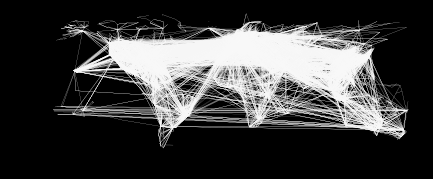

In [19]:
fig = plt.figure(facecolor='black')
ax = plt.axes()

fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('black')

routes_geodata.plot(ax=ax, color='white', linewidth=0.1)

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')

plt.savefig("outputs/lines_1.png", dpi=600, bbox_inches='tight')
plt.show()

Cartopy can be used to manipulate the way that lines are plotted. The transform=ccrs.Geodetic() method transforms the LineStrings to account for the earths curvature. I have also changed the projection to the Robinson projection because it is one of the more realistic ways to plot global datasets, accounting for the fact that the earth is not flat. I also have reduced the alpha value to 0.1 to make it a little bit clearer.

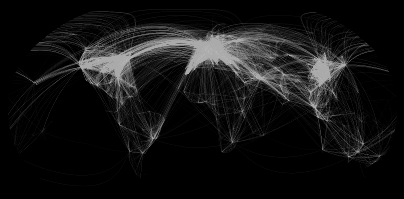

In [20]:
fig = plt.figure(facecolor='black')
ax = plt.axes(projection=ccrs.Robinson())
fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('black')

routes_geodata.plot(ax=ax, transform=ccrs.Geodetic(), color='white', linewidth=0.1, alpha=0.1)

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')
ax.set_ylim(-7000000, 8800000)
plt.savefig("outputs/lines_2.png", dpi=600, bbox_inches='tight')

plt.show()

### Exercise 3

- Use the routes data to add a new column to the airports DataFrame with a value showing the number of flights that landed in that airport
- Create a plot combining the routes and airports into one
- Scale the size of the airport points according to the number of flights that land there.
- The expected output is shown below.

![alt text](resources/assets/airroutes_mad.png "Title")